## Digit recognizer using CNN

## Loading the Dataset

MNIST (“Modified National Institute of Standards and Technology”) is the de facto “Hello World” dataset of computer vision.

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

The data set contains 60,000 traning images and 10000 testing images. Here I split the data into training and testing datasets respectively. The x_train & x_test contains grayscale codes while y_test & y_train contains labels from 0–9 which represents the numbers.

In [2]:
x_train.shape

(60000, 28, 28)

## Data Preprocessing

We can see we have (60000,28,28) as our shape of the dataset which means that we have 60000 images in our dataset and size of each image is 28 * 28 pixel.
To use Keras API we need a 4-dimensional array but we can see from above that we have a 3-dimension numpy array.
So, here we convert the 3-dimension numpy array into 4-dimensional and after we set the type as float to have floating values after the division.

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Now coming to the normalizing part, this is done by dividing it by 255 (which is the maximum RGB code minus the minimum RGB code).

In [5]:
x_train /= 255
x_test /= 255

## Building the Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

I had import the Sequential Model from Keras and added Conv2D, MaxPooling, Flatten, Dropout, and Dense layers.
Dropout layers helps to fight with the overfitting by disregarding some of the neurons while training while Flatten layers flatten 2D arrays to 1D array before building the fully connected layers.

## Compiling and fitting the Model

So far, we have created an non-optimized empty CNN. Then I set an optimizer with a given loss function which uses a metric and fit the model by using our train data. The ADAM optimizer is said to outperform the other optimizers, that’s why I used that.

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3612 - accuracy: 0.8921
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0881 - accuracy: 0.9730
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0557 - accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0429 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0315 - accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0254 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0249 - accuracy: 0.99150s
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0177 - accuracy: 0.9935
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0177 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 31s 1

## Model Evaluation

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0625 - accuracy: 0.9846


[0.062498487532138824, 0.9846000075340271]

## Checking the Prediction

5


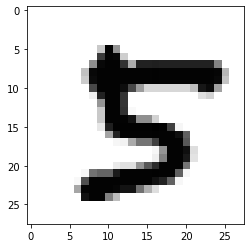

In [9]:
import matplotlib
import matplotlib.pyplot as plt
image_index = 2653
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [10]:
model.save('mnist.h5')